In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
df = pd.read_csv('fraud_dataset_example.csv')

In [96]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [97]:
df.shape

(101613, 11)

In [98]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [99]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [100]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [101]:
columns = {
    'step':'tempo', 
    'type':'tipo', 
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1', 
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
    'isFraud':'fraude',
    'isFlaggedFraud':'super_fraude'    
}

df = df.rename(columns = columns)
df.head()

,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,fraude,super_fraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [102]:
df['tipo'].value_counts()

tipo
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: count, dtype: int64

In [103]:
df = pd.get_dummies(data = df,columns = ['tipo'], dtype = int)
df.head()

,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,fraude,super_fraude,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [104]:
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis=1)
df.head()

,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,fraude,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [105]:
# separação dos dados para treinamento
x = df.drop('fraude', axis = 1)
y = df['fraude']

In [106]:
x.head(2)

,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0


In [107]:
print(x.shape)
print(y.shape)


(101613, 11)
(101613,)


In [108]:
from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=SEED)

In [109]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(76209, 11)
(76209,)
(25404, 11)
(25404,)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
predicao = lr.predict(x_test)

print('acurácia:', metrics.accuracy_score(y_test, predicao))
print('Previsão:', metrics.precision_score(y_test, predicao))
print('Recall:', metrics.recall_score(y_test, predicao))
print('F1:', metrics.f1_score(y_test, predicao))

acurácia: 0.9994489056841442
Previsão: 0.6363636363636364
Recall: 0.9130434782608695
F1: 0.75


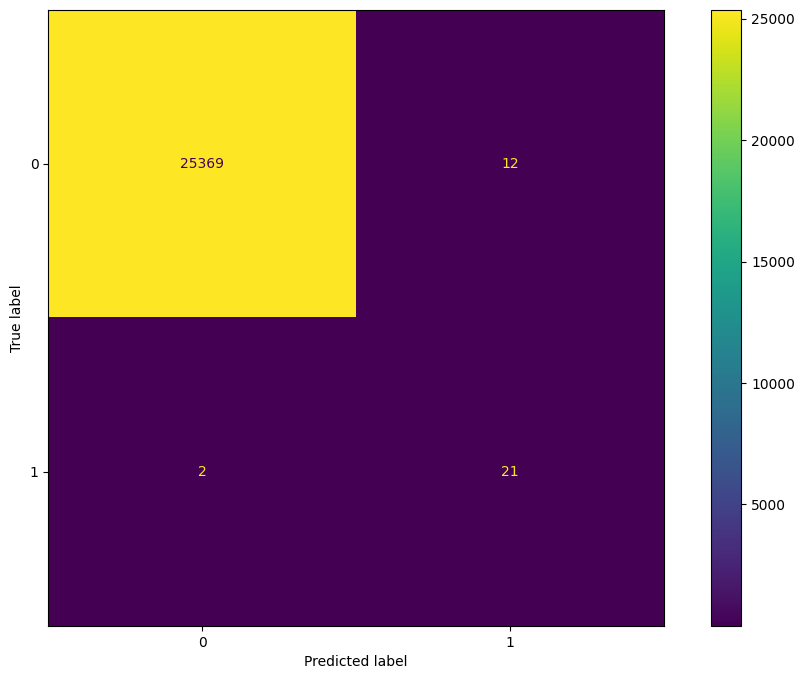

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(y_test, predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

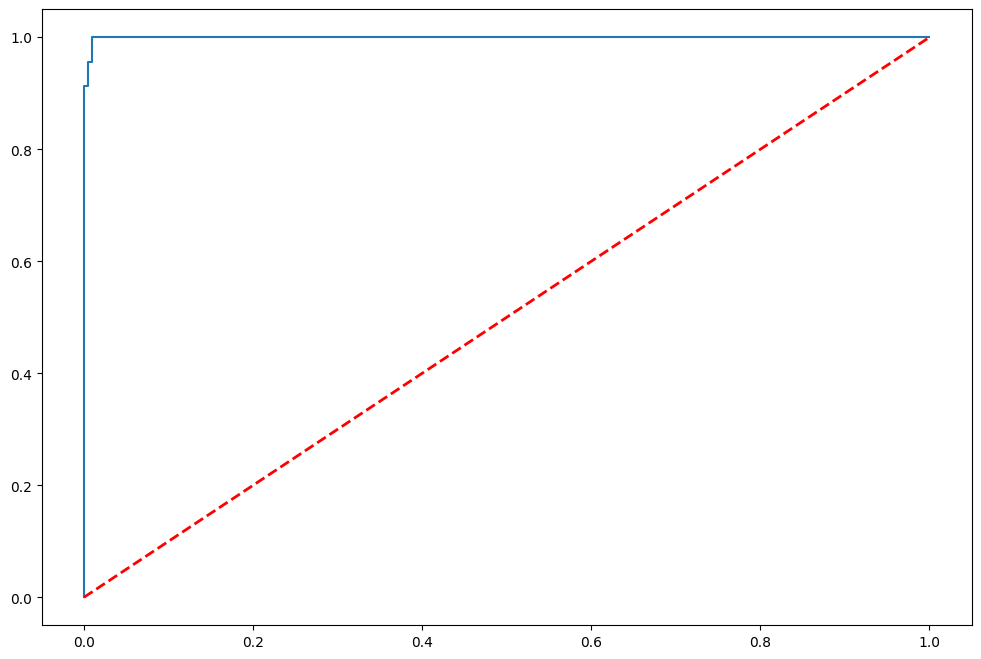

In [112]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fpr, tpr, label = "LR, auc = "+str(auc))
plt.plot([0,1],[0,1],color='red', lw = 2, linestyle = '--')

### Balanceamento dos dados

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
SEED = 42

smote = SMOTE(random_state = 42)

In [115]:
x = df.drop('fraude', axis = 1)
y = df['fraude']

In [116]:
x.shape

(101613, 11)

In [117]:
y.shape

(101613,)

In [118]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [119]:
df_balanced = pd.concat([y_resampled, x_resampled], axis = 1)
df_balanced.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [120]:
df_balanced.groupby('fraude')['tempo'].count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [121]:
x = df_balanced.iloc[:,1:].values
y = df_balanced.iloc[:,0].values

In [122]:
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=SEED)

In [123]:

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
predicao = lr.predict(x_test)

print('acurácia:', metrics.accuracy_score(y_test, predicao))
print('Previsão:', metrics.precision_score(y_test, predicao))
print('Recall:', metrics.recall_score(y_test, predicao))
print('F1:', metrics.f1_score(y_test, predicao))

acurácia: 0.9417722516699837
Previsão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


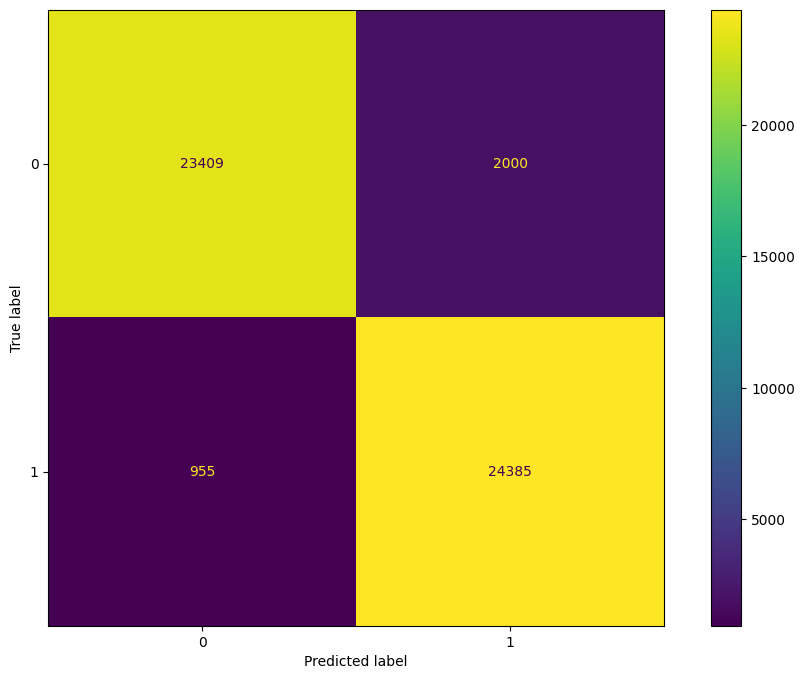

In [124]:
cm = confusion_matrix(y_test, predicao)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

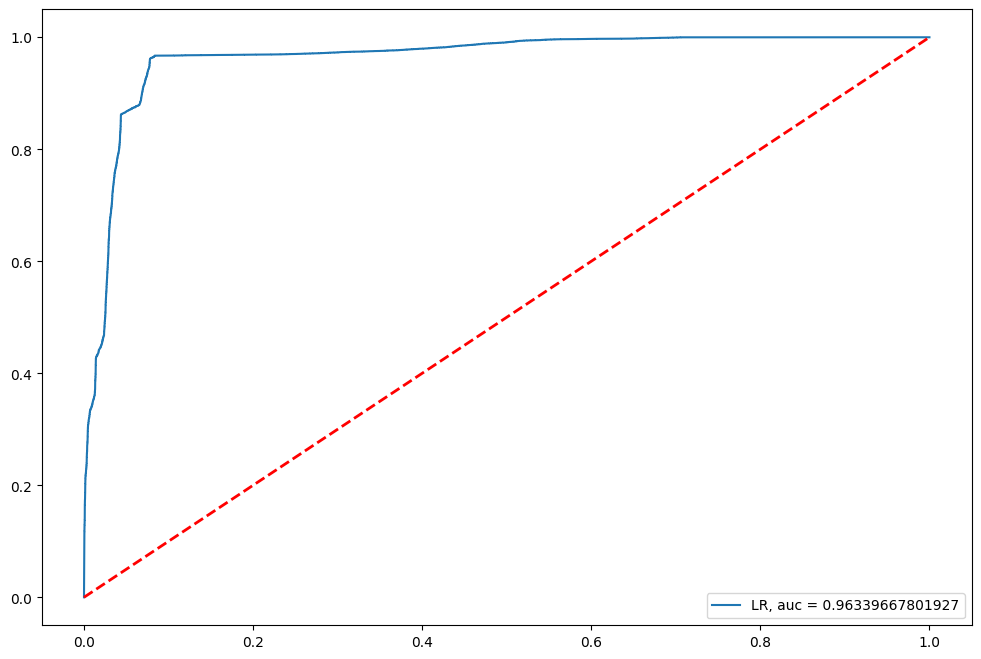

In [125]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fpr, tpr, label = "LR, auc = "+str(auc))
plt.plot([0,1],[0,1],color='red', lw = 2, linestyle = '--')
plt.legend(loc = 4)